In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

b value greater than 1 mean that the flow regime is transient and that there isn't boundary dominated flow regime for which was developed the Arps method, so it is not correct to use it to make reserves forecasting of the field when we find these values in the b coefficient.

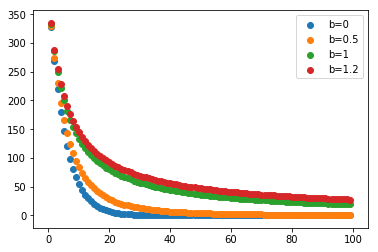

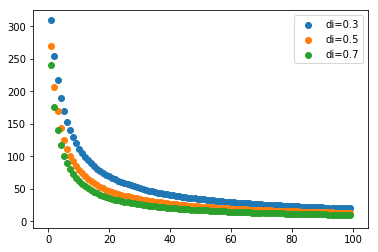

In [81]:
import scipy.integrate as intergrate
def func_dca(DaysOn, qi, di, b, **args):
    if b == 0: #exponential
        y = qi * np.exp(-np.array(DaysOn) * di)
    else:
        y = qi/((1+di*b*np.array(DaysOn))**(1/b))
    return y

qi, di, b = 400, 0.2, 1.2
x = range(1, 100)
y = func_dca(x, qi, di, b) * (1 + np.random.rand(len(x)))
for b in [0, 0.3, 1, 1.2]:
    plt.scatter(x, func_dca(x, qi, di, b))
plt.legend(['b='+str(_) for _ in [0, 0.5, 1, 1.2]])
plt.show()

for di in [0.3, 0.5, 0.7]:
    plt.scatter(x, func_dca(x, qi, di, b))
plt.legend(['di='+str(_) for _ in [0.3, 0.5, 0.7]])
plt.show()

In [51]:
param_fit, _ = curve_fit(func_dca, x, y, bounds=([0, 0, 0], [1000, 2, 2]))

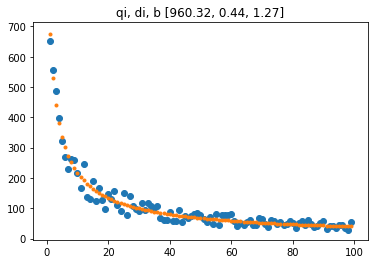

In [75]:
plt.scatter(x, y, marker='o')
plt.scatter(x, func_dca(x, *param_fit), marker='.')
plt.title(f'qi, di, b {list(param_fit.round(2))}')
plt.show()

In [82]:
param_fit.round(2).tolist()

[960.32, 0.44, 1.27]

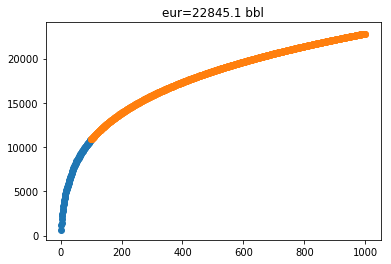

In [115]:
Days_fcst = range(100, 1000)
plt.scatter( x, y.cumsum())
plt.scatter(Days_fcst, y.cumsum()[-1] + func_dca(Days_fcst, *param_fit).cumsum())
eur = y.cumsum()[-1] + intergrate.quad(func_dca, x[-1], Days_fcst[-1], args=tuple(param_fit))[0]
plt.title(f'eur={eur.round(2)} bbl')
plt.show()

In [118]:
intergrate.quad(func_dca, x[-1], Days_fcst[-1], args=tuple(param_fit)), intergrate.quad(func_dca, 1, 100, args=(400, 0.5, 1.2))

((12010.221729863071, 2.5702674456661753e-05),
 (3610.308135922264, 9.322880031821827e-06))